In [1]:
import matplotlib.pyplot as plt

In [2]:

import cv2

In [3]:
im =  cv2.imread('kalash.jpg') #Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(1239, 1080, 3)


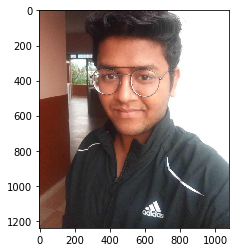

In [4]:
plt.imshow(im)
plt.show()

In [5]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))#all_pixels  = im.reshape((300*500,3)) both are equal
print(all_pixels.shape)

(1338120, 3)


In [6]:
from sklearn.cluster import KMeans

In [7]:

dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
centers = km.cluster_centers_

In [9]:
centers

array([[120.3410501 ,  90.40869706,  81.36677904],
       [251.95051233, 250.78971664, 249.70084629],
       [ 55.54026174,  43.76856105,  42.77827271],
       [205.02383676, 156.52559255, 137.15874023]])

In [10]:
import numpy as np
centers = np.array(centers,dtype='uint8')


In [11]:
centers.shape

(4, 3)

# Plot what all colors are these

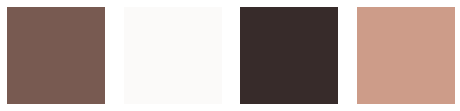

In [12]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [13]:
new_img = np.zeros((1239*1080,3),dtype='uint8')

print(new_img.shape)

(1338120, 3)


In [14]:

colors

[array([120,  90,  81], dtype=uint8),
 array([251, 250, 249], dtype=uint8),
 array([55, 43, 42], dtype=uint8),
 array([205, 156, 137], dtype=uint8)]

In [15]:

km.labels_

array([0, 0, 0, ..., 2, 2, 2])

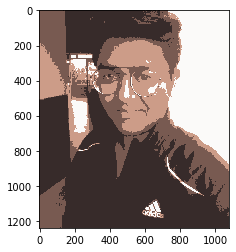

In [56]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()


In [18]:
new_img.shape

(1239, 1080, 3)